In [75]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress


#load the data
file1 = 'Monthly.xls'
df=pd.read_excel(file1)
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

#setting the starting date and ending date
start_date = '1991-01-01'
end_date = '2016-12-31'

#Filtering the data
filter_data=df[(df.index >= start_date) & (df.index <=end_date)]


In [76]:
filter_data

,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
Date,,,,,,
1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN
...,...,...,...,...,...,...
2016-08-01,206144.961815,411.237157,409.465432,0.007744,0.055643,0.009269
2016-09-01,206014.691677,410.977282,410.292238,0.002019,0.053326,0.010542
2016-10-01,205904.191651,410.756846,410.256066,-0.000088,0.046223,0.011086


In [77]:
file2 = 'FTSE100.csv'
dataframe = pd.read_csv(file2)


dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date', inplace=True)
dataframeS = dataframe.sort_index(ascending=True)

In [78]:
dataframeS

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1991-01-01,2143.500000,2182.100098,2052.300049,2170.300049,0,2170.300049
1991-02-01,2168.500000,2388.399902,2155.600098,2380.899902,0,2380.899902
1991-03-01,2374.899902,2527.100098,2368.399902,2456.500000,0,2456.500000
1991-04-01,2456.500000,2555.300049,2438.600098,2486.199951,0,2486.199951
1991-05-01,2487.399902,2554.899902,2444.600098,2499.500000,0,2499.500000
...,...,...,...,...,...,...
2016-08-01,6724.430000,6769.410000,6678.450000,6693.950000,727709696,6693.950000
2016-09-01,6781.510000,6826.220000,6723.210000,6745.970000,991756480,6745.970000
2016-10-03,6899.330000,6996.430000,6898.090000,6983.520000,745408640,6983.520000


In [79]:
#calculation of monthly return of FTSE dependent variable
Monthly_return_FTSE100 = dataframeS['Adj Close'].pct_change().dropna()

In [80]:
#calculation of monthly return of monthly independent variables
monthly_return=filter_data['Average House Price'].pct_change().dropna()


In [81]:
#lineregress library
slope, intercept, r_value,p_value,std_err = linregress(monthly_return, Monthly_return_FTSE100)

In [189]:
print("Slope", slope)
print("Intercept", intercept)
print("R-squared", r_value)
print("P-value", p_value)
print("Standard Error", std_err)
print("CORRERATION COEFF",  r_value)
print("the null hypothesis is not rejected")

Slope 0.09324142754349966
Intercept 0.004047837686662456
R-squared 0.026551295701909915
P-value 0.6409049000031651
Standard Error 0.1997058644355541
CORRERATION COEFF 0.026551295701909915
the null hypothesis is not rejected


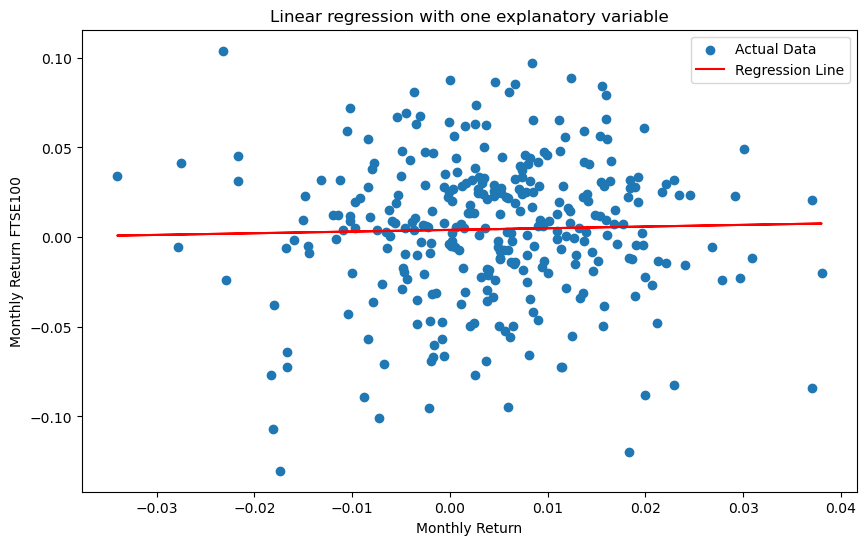

In [13]:
predicted_values = slope * monthly_return + intercept

#ploting the return
plt.figure(figsize=(10,6))
plt.scatter(monthly_return, Monthly_return_FTSE100, label = 'Actual Data')


plt.plot(monthly_return, predicted_values, color='red', label='Regression Line')
plt.xlabel('Monthly Return')
plt.ylabel('Monthly Return FTSE100')
plt.legend()
plt.title('Linear regression with one explanatory variable')
plt.show()

# question 2

In [14]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#load the data
file = 'College.csv'
df =pd.read_csv(file)

In [15]:
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [16]:
#calculation of correlation coeffient

cols =['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc','Grad.Rate' ]
correlation_coeffient = df[cols].corr()


In [17]:
correlation_coeffient

,Apps,Enroll,Outstate,Top10perc,Top25perc,Grad.Rate
Apps,1.000000,0.846822,0.050159,0.338834,0.351640,0.146755
Enroll,0.846822,1.000000,-0.155477,0.181294,0.226745,-0.022341
Outstate,0.050159,-0.155477,1.000000,0.562331,0.489394,0.571290
Top10perc,0.338834,0.181294,0.562331,1.000000,0.891995,0.494989
Top25perc,0.351640,0.226745,0.489394,0.891995,1.000000,0.477281
Grad.Rate,0.146755,-0.022341,0.571290,0.494989,0.477281,1.000000


In [18]:
#necessary column
x= df[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc']]
y = df['Grad.Rate']

#perform stepwise backward regression
def backward_regression(x, y,
                           threshold_out,
                           verbose=False):
    included=list(x.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(x[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


backward_stepwise_data = backward_regression(x, y, threshold_out = 0.05,  verbose=True)
print ("The stepwise backward: ", backward_stepwise_data)
print("")




#perform BIC to select a model
reg = linear_model.LassoLarsIC(criterion='bic')

#fit the model with the data
reg.fit(x,y)

feature_coefficients = reg.coef_

selected_features = list(x.columns[feature_coefficients != 0])
#display the selected feature name
for feature in selected_features:    
    print("The selected features by BIC: ", feature)



    
    
#perfrom the accuracy between the Stepwise and BIc, I split it int training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42) 



#all predictors
all_predictors = df[['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc']]

#define useful predictor 
usefull_predictor= df[['Apps', 'Enroll', 'Outstate', 'Top25perc']]

#fit the model of all five predictors
x_all = sm.add_constant(all_predictors)
model_all = sm.OLS(y,x_all).fit()

#make aprediction of all five varibale
y_prediction_all = model_all.predict(x_all)

#Calculate accuracy using all five predictors
mse_all = mean_squared_error(y, y_prediction_all)
r2_all = r2_score(y, y_prediction_all)





#fit the model of only useful predictors
x_useful = sm.add_constant(usefull_predictor)
model_useful = sm.OLS(y,x_useful).fit()

#make aprediction of all five varibale
y_prediction_useful = model_useful.predict(x_useful)


#accuracy of all five predictors
mse_useful = mean_squared_error(y, y_prediction_useful)
r2_useful = r2_score(y, y_prediction_useful)
print("")
print("Mean squared error with all predictors ", mse_all)
print("R-squared with all predictors", r2_all)

print("")
print("Mean squared error with useful predictors ", mse_useful)
print("R-squared with useful predictors", r2_useful)
    

#for the selected features model
model_with_selected_features = LinearRegression()
model_with_selected_features.fit(x_train[backward_stepwise_data], y_train)


#the graduation rate for CMU with most accurate model
cmu_data = df[df['Unnamed: 0'] == 'Carnegie Mellon University']
cmu_x = cmu_data [['Apps', 'Enroll', 'Outstate', 'Top10perc', 'Top25perc']]


predicted_graduation_rate = model_with_selected_features.predict(cmu_x[selected_features])
print("")
print("Predicted Graduation Rate for Carnegie Mellon University ", predicted_graduation_rate)


Drop Top10perc                      with p-value 0.446344
The stepwise backward:  ['Apps', 'Enroll', 'Outstate', 'Top25perc']

The selected features by BIC:  Apps
The selected features by BIC:  Enroll
The selected features by BIC:  Outstate
The selected features by BIC:  Top25perc

Mean squared error with all predictors  180.8954688977305
R-squared with all predictors 0.3861582005130557

Mean squared error with useful predictors  181.03167157338038
R-squared with useful predictors 0.3856960170430921

Predicted Graduation Rate for Carnegie Mellon University  [89.03958667]


# question 3

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Load data the data
filename1 = 'transportGoodService.csv'
filename2 = 'good_service.csv'

data1 = pd.read_csv(filename1)

data2 = pd.read_csv(filename2)

Summary statististics for transport Data,                 0
count  61.000000
mean   21.116439
std     3.509040
min    13.581480
25%    18.112527
50%    21.182461
75%    24.334066
max    27.659705

Summary statististics for Goods and services,                    0
count  6.300000e+01
mean   4.373704e+10
std    4.126098e+10
min    2.238599e+09
25%    1.011426e+10
50%    2.785575e+10
75%    8.084171e+10
max    1.357390e+11


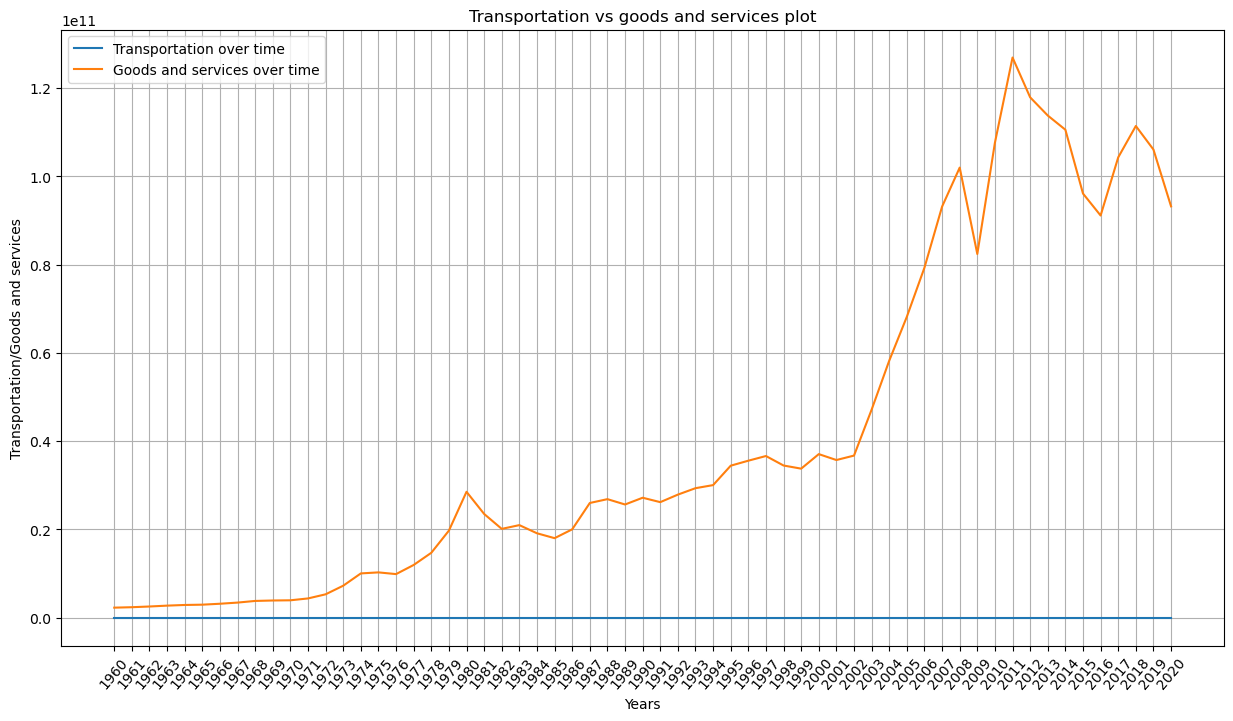

The predicted goods and services in 2021 is  115626829093.53516


In [41]:
south_aftrica_transport_data = data1.loc[data1["Country Name"]=="South Africa"].iloc[:, 4:]
years = south_aftrica_transport_data.columns
south_aftrica_transports = south_aftrica_transport_data.values[0]

usable_south_aftrica_transports = south_aftrica_transports[:61]

summary = pd.DataFrame(usable_south_aftrica_transports)
summmary_statististics = summary .describe()
print("Summary statististics for transport Data, ", summmary_statististics)



south_aftrica_goods_data = data2.loc[data1["Country Name"]=="South Africa"].iloc[:, 4:]

south_aftrica_goods = [goods for  goods in south_aftrica_goods_data.values][0]

south_aftrica_goods = np.array(south_aftrica_goods)
south_aftrica_goods_usable = south_aftrica_goods[:61]


summaryy = pd.DataFrame(south_aftrica_goods)
summmary_statististics = summaryy.describe()
print("")
print("Summary statististics for Goods and services, ", summmary_statististics)



X = pd.DataFrame([years,usable_south_aftrica_transports])
X=X.T.dropna()
# X.insert(0,"const",1)

plt.figure(figsize=(15,8))
plt.plot(years[:61],usable_south_aftrica_transports,label="Transportation over time")
plt.plot(years[:61],south_aftrica_goods_usable,label="Goods and services over time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=50)
plt.title("Transportation vs goods and services plot")
plt.xlabel("Years")
plt.ylabel("Transportation/Goods and services")
plt.show()



# #Train the model using south_aftrica_transports

goods_regression = LinearRegression().fit(X.values,south_aftrica_goods_usable)
rsquared = goods_regression.score(X.values,south_aftrica_goods_usable)

#Predict 2021
X_predict = np.array([2021,13.83825372]).reshape(1,-1)

predicted_2021 = goods_regression.predict(X_predict)

print("The predicted goods and services in 2021 is ",predicted_2021.item())

# question 4

In [10]:
import quandl 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np



#Set Api Key
quandl.ApiConfig.api_key = 'ZVuhCUSabdWk_7kCPzhz'


# Download unemplyment data
unemployment = quandl.get('ODA/ISR_LUR').reset_index()

#filter the dat to use only up to the specified end date
# end_date = "2013-12-31"

unemploymentNew= unemployment.loc[unemployment["Date"] <= "2013-09-02"]
#converting date to numeric
unemploymentNew['numericDate'] = unemploymentNew['Date'].dt.strftime("%Y")


#define independent and pependent variavle
x = unemploymentNew['numericDate']
y = unemploymentNew['Value']

#define the model
model = LinearRegression()


#fit linear regression model
model.fit(x.values.reshape(-1,1), y)

#predict the unemployment rate for 2020
unemplyment_year_2020 = 2020
predicted_unemploymnet_rate = model.predict([[unemplyment_year_2020]])[0]


#define MAPE function
def MAPE(y_actual, y_predicted):
    return np.mean(np.abs((y_actual - y_predicted) / y_actual)) * 100
    
#calling the function     
mape = MAPE(y, model.predict(x.values.reshape(-1,1)))


print("Predicted unemploymnet rate in 2020: ", predicted_unemploymnet_rate)
print("Mean Absolute Percentage Error (MAPE): ", mape)

Accuracy = 100-mape
print(f"Accuracy: {Accuracy}")

Predicted unemploymnet rate in 2020:  12.078546345811048
Mean Absolute Percentage Erroe (MAPE):  21.99260154027202
Accuracy: 78.00739845972798


C:\Users\Nadine\AppData\Local\Temp\ipykernel_14756\424937828.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemploymentNew['numericDate'] = unemploymentNew['Date'].dt.strftime("%Y")
